<a href="https://colab.research.google.com/github/akilchen/side-project/blob/Python/Bank_Customer_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

下載、載入資料集

In [16]:
!pip install -q kaggle

In [17]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [18]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [20]:
!cp kaggle.json ~/.kaggle/

In [21]:
!chmod 600 ~/.kaggle/kaggle.json

In [22]:
!kaggle datasets list

ref                                                               title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/student-depression-dataset                            Student Depression Dataset                             467020  2025-03-13 03:12:30.423000          18710        298  1.0              
jayaantanaath/student-habits-vs-academic-performance              Student Habits vs Academic Performance                  19512  2025-04-12 10:49:08.663000           1314         25  1.0              
zahidmughal2343/amazon-sales-2025                                 Amazon Sales 2025                                        3617  2025-04-03 22:08:13.607000           3929         48  1.0          

In [25]:
!kaggle datasets download -d gauravtopre/bank-customer-churn-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
License(s): other
bank-customer-churn-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!unzip bank-customer-churn-dataset.zip

Archive:  bank-customer-churn-dataset.zip
  inflating: Bank Customer Churn Prediction.csv  


In [29]:
import pandas as pd
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
# 看一下基本結構
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [31]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [32]:
# 看是否有缺值
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


A.流失比例

In [33]:
df['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.7963
1,0.2037


### B.交叉分析

(1)性別X流失率

In [42]:
print(pd.crosstab(df['gender'], df['churn']))
print(pd.crosstab(df['gender'], df['churn'], normalize='index'))

churn      0     1
gender            
Female  3404  1139
Male    4559   898
churn          0         1
gender                    
Female  0.749285  0.250715
Male    0.835441  0.164559


這個結果代表不論男性和女性，留住率皆高於流失率，但只看流失率的話，女性的流失率看似高於男性。但是否顯著還是要做假設檢定(卡方檢定)，不能貿然判定。

(2)國家X流失

In [41]:
print(pd.crosstab(df['country'], df['churn']))
print(pd.crosstab(df['country'], df['churn'], normalize='index'))

churn       0    1
country           
France   4204  810
Germany  1695  814
Spain    2064  413
churn           0         1
country                    
France   0.838452  0.161548
Germany  0.675568  0.324432
Spain    0.833266  0.166734


(3)產品數量X流失

In [43]:
print(pd.crosstab(df['products_number'], df['churn']))
print(pd.crosstab(df['products_number'], df['churn'], normalize='index'))

churn               0     1
products_number            
1                3675  1409
2                4242   348
3                  46   220
4                   0    60
churn                   0         1
products_number                    
1                0.722856  0.277144
2                0.924183  0.075817
3                0.172932  0.827068
4                0.000000  1.000000


(4)有無信用卡X流失

In [44]:
print(pd.crosstab(df['credit_card'], df['churn']))
print(pd.crosstab(df['credit_card'], df['churn'], normalize='index'))

churn           0     1
credit_card            
0            2332   613
1            5631  1424
churn               0         1
credit_card                    
0            0.791851  0.208149
1            0.798157  0.201843


(4)活躍客戶X流失

In [45]:
print(pd.crosstab(df['active_member'], df['churn']))
print(pd.crosstab(df['active_member'], df['churn'], normalize='index'))

churn             0     1
active_member            
0              3547  1302
1              4416   735
churn                 0         1
active_member                    
0              0.731491  0.268509
1              0.857309  0.142691


### C. 數值變數與流失的平均趨勢圖

1.年資&流失

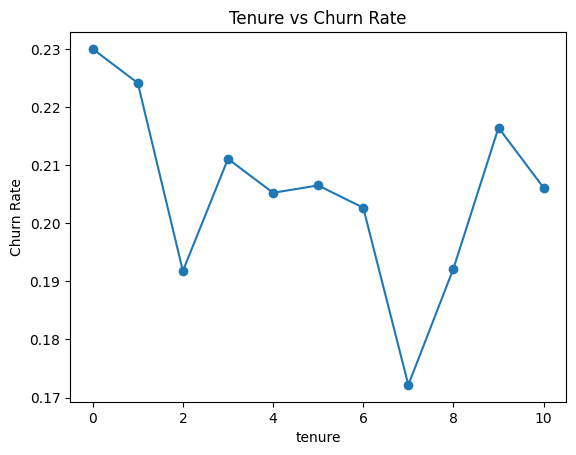

In [38]:
import matplotlib.pyplot as plt

df.groupby('tenure')['churn'].mean().plot(kind='line', marker='o')
plt.title('Tenure vs Churn Rate')
plt.ylabel('Churn Rate')
plt.show()

2.credit_score(信用分數)&churn(流失)

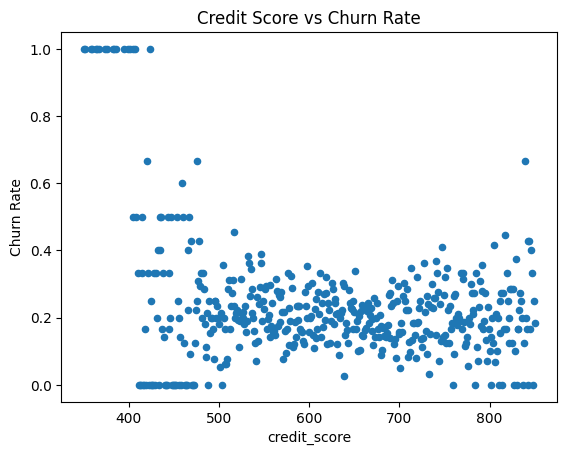

In [53]:
# 計算各credit_score對應的平均流失率，且把他做成DataFrame
credit_churn_df = df.groupby('credit_score')['churn'].mean().reset_index() #.reset_index():把群組後的Series變成DataFrame

# 畫出散佈圖
credit_churn_df.plot.scatter(x='credit_score', y='churn')
plt.title('Credit Score vs Churn Rate')
plt.ylabel('Churn Rate')
plt.show()

<ipython-input-60-84774c92eb88>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('cscore_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


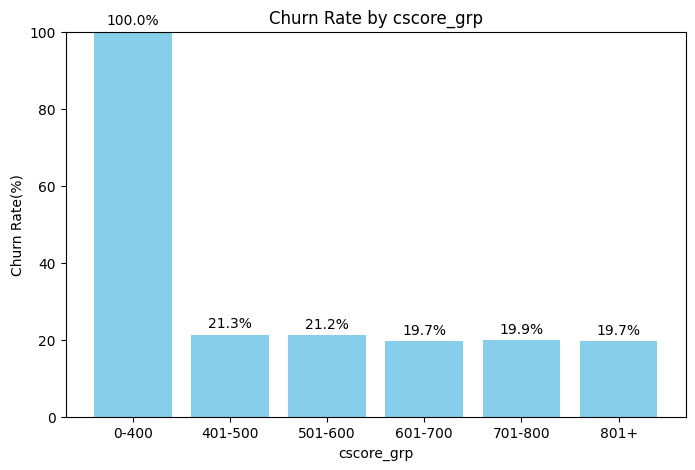

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 分數分箱
bins = [0, 400, 500, 600, 700, 800, 1000]
labels = ['0-400', '401-500', '501-600', '601-700', '701-800', '801+']
df['cscore_grp'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=True) #pd.cut()可以快速將數值欄位轉成分組（分類）欄位。

# 計算每個信用分數區間的平均流失率
grouped = df.groupby('cscore_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['cscore_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.1f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('cscore_grp')
plt.ylabel('Churn Rate(%)')
plt.title('Churn Rate by cscore_grp')
plt.ylim(0, 100)
plt.show()

3.age(年齡)&churn(流失)

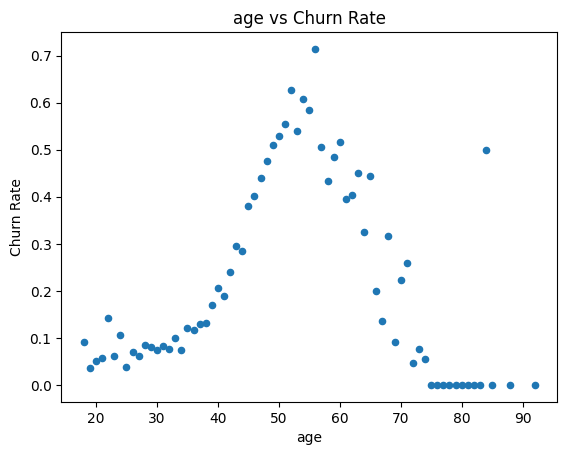

In [54]:
# 計算各credit_score對應的平均流失率，且把他做成DataFrame
credit_churn_df = df.groupby('age')['churn'].mean().reset_index() #.reset_index():把群組後的Series變成DataFrame

# 畫出散佈圖
credit_churn_df.plot.scatter(x='age', y='churn')
plt.title('age vs Churn Rate')
plt.ylabel('Churn Rate')
plt.show()

4.balance(帳戶餘額)&churn(流失)

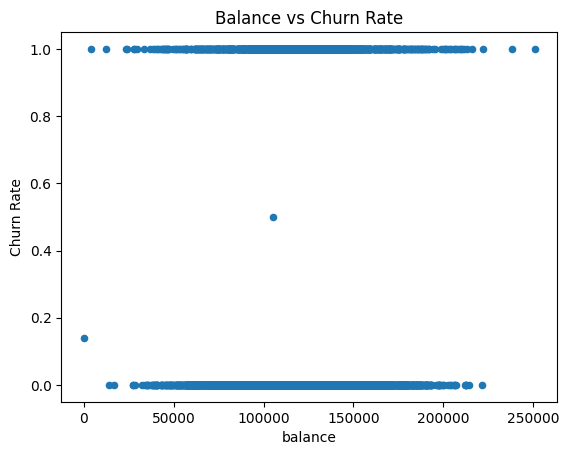

In [55]:
# 計算各balance對應的平均流失率，且把他做成DataFrame
credit_churn_df = df.groupby('balance')['churn'].mean().reset_index() #.reset_index():把群組後的Series變成DataFrame

# 畫出散佈圖
credit_churn_df.plot.scatter(x='balance', y='churn')
plt.title('Balance vs Churn Rate')
plt.ylabel('Churn Rate')
plt.show()

<ipython-input-75-f077538fff9f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('balance_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


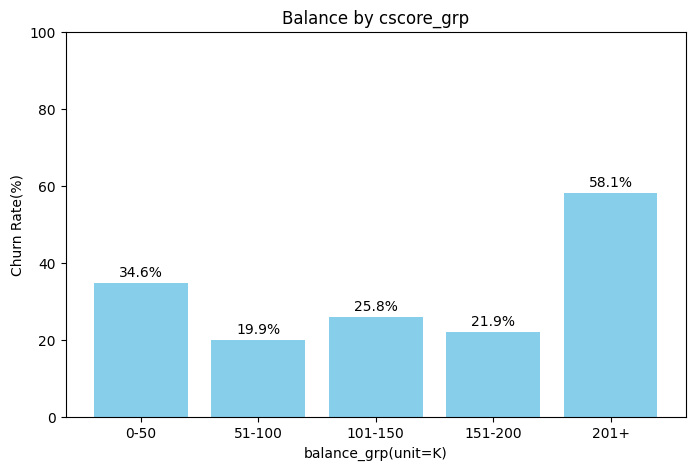

In [75]:
import numpy as np
# 分數分箱
bins = [0, 50999, 100999, 150999, 200999, 250999]
labels = ['0-50', '51-100', '101-150', '151-200', '201+']
df['balance_grp'] = pd.cut(df['balance'], bins=bins, labels=labels, right=True) #pd.cut()可以快速將數值欄位轉成分組（分類）欄位。

# 計算每個信用分數區間的平均流失率
grouped = df.groupby('balance_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['balance_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.1f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('balance_grp(unit=K)')
plt.ylabel('Churn Rate(%)')
plt.title('Balance by cscore_grp')
plt.ylim(0, 100)
plt.show()

201K以上占58.1%的流失率，感覺有異，做分組的交叉分析細看狀況

In [77]:
# 分箱
bins = [0, 50999, 100999, 150999, 200999, 250999]
labels = ['0-50K', '51-100K', '101-150K', '151-200K', '201+']
df['balancect_grp'] = pd.cut(df['balance'], bins=bins, labels=labels, right=True)

# 用交叉表查看每組balance的流失與否人數
ct = pd.crosstab(df['balancect_grp'], df['churn'])

# 加上row百分比
ct_percent = pd.crosstab(df['balancect_grp'], df['churn'], normalize='index') * 100


print(ct)
print(ct_percent)

churn             0    1
balancect_grp           
0-50K            51   27
51-100K        1258  313
101-150K       2827  983
151-200K        697  196
201+             13   18
churn                  0          1
balancect_grp                      
0-50K          65.384615  34.615385
51-100K        80.076384  19.923616
101-150K       74.199475  25.800525
151-200K       78.051512  21.948488
201+           41.935484  58.064516


比例比較高的原因在於201+人數比較少

5.estimated_salary(預估年薪)&churn(流失)